In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import datetime
import os


### Global Thresholding

In [2]:
img = cv2.imread('gradient.png',0)
r,th1 = cv2.threshold(img, 55, 255, cv2.THRESH_BINARY)
r,th2 = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
r,th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
r,th4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
r,th5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
print(r)
cv2.imshow('Image', img)
cv2.imshow('th1', th1)
cv2.imshow('th2', th2)
cv2.imshow('th3', th3)
cv2.imshow('th4', th4)
cv2.imshow('th5', th5)

cv2.waitKey(0)
cv2.destroyAllWindows()

127.0


### Adaptive Thresholding

In [9]:
img = cv2.imread('sudoku.png',0)
r, th1 = cv2.threshold(img, 90, 255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 111, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 111, 2)

cv2.imshow('Image', img)
cv2.imshow('th1', th1)
cv2.imshow('th2', th2)
cv2.imshow('th3', th3)

cv2.waitKey(0)
cv2.destroyAllWindows()

### matplotlib and open-cv

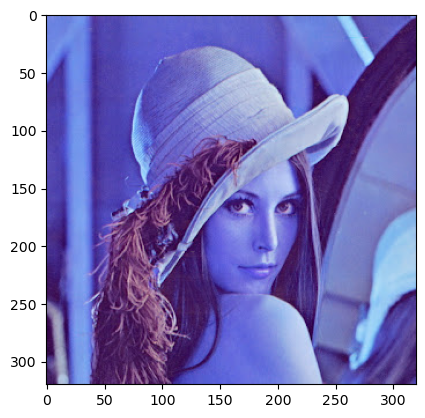

In [17]:
img = cv2.imread('lena.jpg', -1)
cv2.imshow('lena', img)

plt.imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()

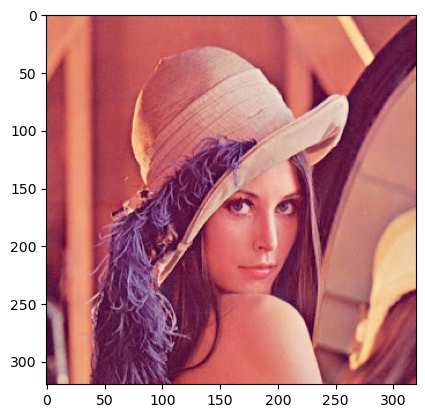

In [18]:
img2= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

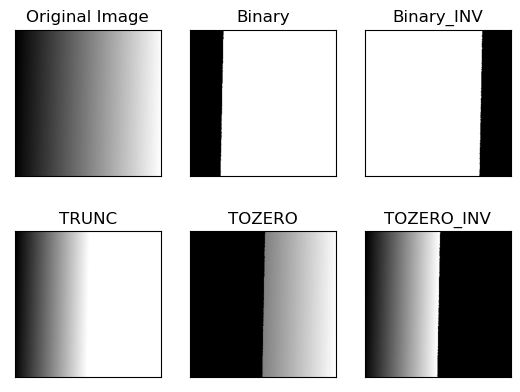

In [22]:
img = cv2.imread('gradient.png',0)

r,th1 = cv2.threshold(img, 55, 255, cv2.THRESH_BINARY)
r,th2 = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
r,th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
r,th4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
r,th5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'Binary', 'Binary_INV', 'TRUNC', 'TOZERO','TOZERO_INV']
images = [img, th1, th2, th3, th4, th5]

for i in range(len(titles)):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

### Morphological Transformations 

- **Dilation** & **Erosion**

- **Opening** (smoothing for bounders)
    - Erosion Followed by Dilation
    
- **Closing** (Fill of gaps)
    - Dilation Followed by Erosion
    
- **Hit or miss transformation**
    - detect object from image 
    - (`A` dilation with `X`)   -intersect with-  (`~A` dilation with (`W` - `X`))  
        - `A` is image
        - `X` is Object of interested
        - `W` is window
  
to get **edges by dilation** `A` - (`A` `dilation with` `B`)

- **Region Filling**
    - `Xk` = (`Xk-1` dilation with `B`) intersection with `~A`
        - `X0` is frist region filling = `p`
        - stop Condation if `Xk` == `Xk-1`
        - finally  `Xk` Union with `A`
- **Connected Componant** 
    - `Xk` = (`Xk-1` dilation with `B`) intersection with `A`
        - `X0` is frist region filling = `p`
        - stop Condation if `Xk` == `Xk-1`

In [29]:
img = cv2.imread('smarties.png', 0)
_, mask = cv2.threshold(img, 220,255, cv2.THRESH_BINARY_INV)

kernerl = np.ones((5,5),np.uint8)
dilation = cv2.dilate(mask, kernerl,iterations = 1 )
erosion= cv2.erode(mask, kernerl,iterations = 1 )
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernerl,iterations = 1 )
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernerl,iterations = 1 )
cv2.imshow('image', img)
cv2.imshow('mask', mask)
# cv2.imshow('after Dilation', dilation)
# cv2.imshow('after erosion',erosion)
cv2.imshow('after opening',opening)
cv2.imshow('after closing',closing)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Smoothing Or Blurring Images
- Blur (Averaging) Filter
- Gaussian Filter
- Median Filter 
- Bilateral Filter

In [35]:
img = cv2.imread('balloons_noisy.png')
averaging = cv2.blur(img , (5,5))#(mean for pixles)
gaussian = cv2.GaussianBlur(img , (5,5),2) # (weighted sum for pixles)for noise images but not all type 
median = cv2.medianBlur(img , 5) # for  salt and paper  noise 
bilateral = cv2.bilateralFilter(img , 9, 75,75) # non-linear filter smooth (blur) an image while preserving edges and fine details.

cv2.imshow('image', img)
cv2.imshow('after Averaging Filter',averaging)
cv2.imshow('after Gussian Filter',gaussian)
cv2.imshow('after median Filter',median)
cv2.imshow('after bilateral Filter',bilateral)


cv2.waitKey(0)
cv2.destroyAllWindows()

### Edge Detection
- **laplacian** (second order derivative)
- **sobal x** 
- **sobal y**
- **Canny edge detection**

    - convert to **`gray scale`** y = 0.299 * `R` + 0.587 * `G` + 0.114 * `B` 
    - Remove noise using **`Gaussian Blur`** 
    - use **`sobel x`** and **`sobel y`** and combine by **:**
        - `Edge_Gradient(G) = sqrt(sobel_X^2 + sobel_Y^2)`
    - apply **`Non-maximum Supperession`** to make the edges thin
    - Hysteresis Thresholding to Connect the strong edges and ignore other 


In [19]:
img = cv2.imread('sudoku.png', 0)
lap = cv2.Laplacian(img,cv2.CV_64F,ksize= 3)
lap = np.uint8(np.absolute(lap)) 

sobel_X = cv2.Sobel(img , cv2.CV_8U, 1, 0)
sobel_y = cv2.Sobel(img , cv2.CV_64F, 0, 1)
# sobel_X = np.uint8(np.absolute(sobel_X))
sobel_y = np.uint8(np.absolute(sobel_y))

combine_slobel = cv2.bitwise_or(sobel_X, sobel_y)

canny = cv2.Canny(img, 100,200)

cv2.imshow('image', img)
cv2.imshow('after Laplacian',lap)
cv2.imshow('after sobel_X',sobel_X)
cv2.imshow('after sobel_y',sobel_y)
cv2.imshow('after combine sobel',combine_slobel)
cv2.imshow('after canny',canny)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Image Pyramids 
- **Gaussian Pyramids** ( used to downsample images )
- **Laplacian Pyramids** ( used to reconstuct an upsample image )

In [21]:
img = cv2.imread('lena.jpg')
layer = img.copy()
gaussian_pyramids= [layer]

n = 5
for i in range(n):
    layer = cv2.pyrDown(layer)
    gaussian_pyramids.append(layer)
#     cv2.imshow(f'layer of Gaussian {i}', layer)
    
layer = gaussian_pyramids[4]

# cv2.imshow('upper level Gaussian Pyramid', layer)

laplacian_pyramids = [layer]

for i in range(4,0,-1 ) :
    gaussian_extended = cv2.pyrUp(gaussian_pyramids[i])
    laplacian = cv2.subtract(gaussian_pyramids[i-1], gaussian_extended)
    cv2.imshow(f'layer of Laplacian {i}', laplacian)
    
    
    
cv2.imshow("Original image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Image Blending using pyramids

In [40]:
apple = cv2.imread('apple.jpg')
orange = cv2.imread('orange.jpg')

print(apple[:,:256].shape, orange[:,256:].shape)
apple_copy = apple.copy()
orange_copy = orange.copy()

apple_orange_combine = np.hstack((apple_copy[:,:256], orange_copy[:,256:]))



n = 6
gp_apples =[apple_copy]
gp_oranges = [orange_copy]
for i in range(n):
    gp_apple = cv2.pyrDown(gp_apples[-1])
    gp_orange = cv2.pyrDown(gp_oranges[-1])
    gp_apples.append(gp_apple)
    gp_oranges.append(gp_orange)

    
    
lp_apples = [gp_apples[-1]]
lp_oranges = [gp_oranges[-1]]

for i in range(n,0,-1):
    gp_apple_extended = cv2.pyrUp(gp_apples[i])
    gp_orange_extended = cv2.pyrUp(gp_oranges[i])
    lp_apple= cv2.subtract(gp_apples[i-1], gp_apple_extended)
    lp_orange= cv2.subtract(gp_oranges[i-1], gp_orange_extended)
    lp_apples.append(lp_apple)
    lp_oranges.append(lp_orange)
    

    
    
apple_orange_pyramids = []
for apple_lap, orange_lap in zip(lp_apples, lp_oranges):
    col, _, _ = apple_lap.shape
    laplacian = np.hstack((apple_lap[:,:int(col/2)], orange_lap[:, int(col/2):]))
    apple_orange_pyramids.append(laplacian)

    
apple_orange_reconstruct = apple_orange_pyramids[0]
for i in range(1, n+1):
    apple_orange_reconstruct = cv2.pyrUp(apple_orange_reconstruct)  
    apple_orange_reconstruct = cv2.add(apple_orange_pyramids[i], apple_orange_reconstruct)       

cv2.imshow('apple_orange_pyramid', apple_orange_pyramids[0])
cv2.imshow('apple', apple)
cv2.imshow('orange', orange)
cv2.imshow('apple and orange without Blending', apple_orange_combine)
cv2.imshow("apple_orange_reconstruct", apple_orange_reconstruct)

cv2.waitKey(0)
cv2.destroyAllWindows()

(512, 256, 3) (512, 256, 3)


### draw contours  

In [58]:
img = cv2.imread('logo.png')
img = cv2.resize(img, (512,512))
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# _, thresh= cv2.threshold(imgray, 20, 255, 0)
canny = cv2.Canny(img,100,200)
contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE,
                                      cv2.CHAIN_APPROX_NONE)
# print(len(contours))
# print(contours[0])
cv2.drawContours(img, contours, -1, (0,255,0),1)
cv2.imshow('img', img)
# cv2.imshow('thresh', thresh)
cv2.imshow('image gray',imgray)
cv2.imshow('canny', canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'drawContours'
> Overload resolution failed:
>  - Can't parse 'contours'. Sequence item with index 0 has a wrong type
>  - Can't parse 'contours'. Sequence item with index 0 has a wrong type
